# Data Wrangling on COVID-19 Data

## Purpose of Analysis
In this project, I will focus on the exploration side of the analysis to examine the spread of corona virus in the world. My exploration will be divided into three parts:

#### Part 1 - Explore the Countries of the World
I am interested in the following variables
- The total number of cases per country
- The total number of deaths per country
- The total number of cases per country divided by the number of population, which I will call **case ratio** 
- The total number of deaths per country divided by the total number of cases for that country, which I will call **death ratio**

For explanatory purpose, I will plot the world map for each variable above to see how the values vary among the countries. I will also plot a bar chart for each variable above to show the top ten affected countries. 

I am also interested to see the progress of the daily cases and deaths over time, so I will create a line chart to achieve that.

#### Part 2 - Find the Relationship between the Number of Total Cases and Population Density
In this part, I would like to answer a question whether a relationship exists between the population density and number of total cases. My initial assumption is that as the population density increases, the total number of cases increases due to higher infection possibility.


#### Part 3 - Explore the Arab world
Here, I will create bar charts as in step 1 but only for Arab world countries. I will also look at the progress of cases and deaths for each country using `sns.FacetGrid`. Finally, I will create a line chart of daily cases for the top five Arab world countries

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd

## Gather

The main file I worked on throughout this analysis was a remote file saved in `url` variable below. However, by July 31, 2020 as I am wrapping up my analysis, it won't be practical to keep working on this remote file due to possible updates or corruption. Therefore, I ran the file and saved it to a local disk `raw_data_07_31_2020.csv`. So now, I am going to work on it.

In [2]:
# this is the remote file which was saved on 7/31/2020 to 'raw_data_07_31_20.csv'
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv' 

# reading the main file after saving it from the remote file above
data = pd.read_csv('raw_data_07_31_20.csv') # this is the saved file to use in this notebook

In [3]:
# read csv file of the countries (downloaded manually from kaggle)
ctrys_data = pd.read_csv('ctrys_pop.csv', engine = 'python')

In [4]:
# read the world map online from geopandas documentation
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

## Assess
### `data` DataFrame
- This is the main file. I am interested in the following variables: `dateRep`, `cases`, `deaths`, `countriesAndTerritories`, `geoId`, `countryterritoryCode`, and `continentExp`. 

In [5]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,31/07/2020,31,7,2020,71,0,Afghanistan,AF,AFG,38041757.0,Asia,3.869432
1,30/07/2020,30,7,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,3.882576
2,29/07/2020,29,7,2020,103,1,Afghanistan,AF,AFG,38041757.0,Asia,4.550263
3,28/07/2020,28,7,2020,105,1,Afghanistan,AF,AFG,38041757.0,Asia,5.028685
4,27/07/2020,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187


In [6]:
data.shape

(33268, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33268 entries, 0 to 33267
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     33268 non-null  object 
 1   day                                                         33268 non-null  int64  
 2   month                                                       33268 non-null  int64  
 3   year                                                        33268 non-null  int64  
 4   cases                                                       33268 non-null  int64  
 5   deaths                                                      33268 non-null  int64  
 6   countriesAndTerritories                                     33268 non-null  object 
 7   geoId                                                       33129 non-null  object 
 

In [8]:
# find the number of missing values for each variable
data.isna().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          139
countryterritoryCode                                            64
popData2019                                                     64
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2781
dtype: int64

In [9]:
# find which countries have missing values in geoId
data[data['geoId'].isna()]['countriesAndTerritories'].unique()

array(['Namibia'], dtype=object)

In [10]:
# Check which countries have missing values in countryterritoryCode
data[data['countryterritoryCode'].isnull()]['countriesAndTerritories'].unique()

array(['Cases_on_an_international_conveyance_Japan'], dtype=object)

In [11]:
# Check which countries have missing values in popData2019
data[data['popData2019'].isnull()]['countriesAndTerritories'].unique()

array(['Cases_on_an_international_conveyance_Japan'], dtype=object)

In [12]:
# find the number of unique countries available in the dataset
len(data['countriesAndTerritories'].unique())

210

In [13]:
# check if we have duplicated entries
data.duplicated().sum()

0

In [14]:
# check the unique values of month
data['month'].unique()

array([ 7,  6,  5,  4,  3,  2,  1, 12], dtype=int64)

In [15]:
# check the unique values of years
data['year'].unique()

array([2020, 2019], dtype=int64)

In [16]:
# check the unique values of continents
data['continentExp'].unique()

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania', 'Other'],
      dtype=object)

### `ctrys_data` DataFrame
- I obtained this file mainly to get the population density, `Density(P/Km2)` as I want to see the relationship between the population density and the total number of cases. Variables of interests are: `Country`, `Country Code`, and `Density(P/Km2)`

In [17]:
ctrys_data.head()

,Internal_Row_ID,Country,Country Code,Population,Yearly Change,Net Change,Density (P/Km2),Land Area (Km2),Migrants (net),Fertility Rate,Medium Age,Urban Pop %,World Share
0,1,China,CN,"1,439,323,776",0.39%,"5,540,090",153.0,"9,388,211","-348,399",1.7,38.0,61%,18.47%
1,2,India,IN,"1,380,004,385",0.99%,"13,586,631",464.0,"2,973,190","-532,687",2.2,28.0,35%,17.70%
2,3,United States,US,"331,002,651",0.59%,"1,937,734",36.0,"9,147,420","954,806",1.8,38.0,83%,4.25%
3,4,Indonesia,ID,"273,523,615",1.07%,"2,898,047",151.0,"1,811,570","-98,955",2.3,30.0,56%,3.51%
4,5,Pakistan,PK,"220,892,340",2.00%,"4,327,022",287.0,"77,088","-233,379",3.6,23.0,35%,2.83%


In [18]:
ctrys_data.tail()

,Internal_Row_ID,Country,Country Code,Population,Yearly Change,Net Change,Density (P/Km2),Land Area (Km2),Migrants (net),Fertility Rate,Medium Age,Urban Pop %,World Share
232,233,Niue,NU,"1,626",0.68%,11,6.0,260,NaN,NaN,NaN,46%,0.00%
233,234,Tokelau,TK,"1,357",1.27%,17,136.0,10,NaN,NaN,NaN,0%,0.00%
234,235,Holy See,VA,801,0.25%,2,2003.0,0,NaN,NaN,NaN,NaN,0.00%
235,236,Others,XX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,237,# Undefined,XY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
ctrys_data.shape

(237, 13)

In [20]:
ctrys_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Internal_Row_ID  237 non-null    int64  
 1   Country          237 non-null    object 
 2   Country Code     236 non-null    object 
 3   Population       235 non-null    object 
 4   Yearly Change    235 non-null    object 
 5   Net Change       235 non-null    object 
 6   Density (P/Km2)  235 non-null    float64
 7   Land Area (Km2)  235 non-null    object 
 8   Migrants (net)   201 non-null    object 
 9   Fertility Rate   201 non-null    float64
 10  Medium Age       201 non-null    float64
 11  Urban Pop %      222 non-null    object 
 12  World Share      235 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 24.2+ KB


In [21]:
ctrys_data.isna().sum()

Internal_Row_ID     0
Country             0
Country Code        1
Population          2
Yearly Change       2
Net Change          2
Density (P/Km2)     2
Land Area (Km2)     2
Migrants (net)     36
Fertility Rate     36
Medium Age         36
Urban Pop %        15
World Share         2
dtype: int64

In [22]:
# check which countries have missing country code
ctrys_data[ctrys_data['Country Code'].isnull()]

,Internal_Row_ID,Country,Country Code,Population,Yearly Change,Net Change,Density (P/Km2),Land Area (Km2),Migrants (net),Fertility Rate,Medium Age,Urban Pop %,World Share
142,143,Namibia,NaN,"2,540,905",1.86%,"46,375",3.0,"82,329","-4,806",3.4,22.0,55%,0.03%


In [23]:
# check which countries have missing density
ctrys_data[ctrys_data['Density (P/Km2)'].isnull()]

,Internal_Row_ID,Country,Country Code,Population,Yearly Change,Net Change,Density (P/Km2),Land Area (Km2),Migrants (net),Fertility Rate,Medium Age,Urban Pop %,World Share
235,236,Others,XX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,237,# Undefined,XY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# look for duplicate entries
ctrys_data[ctrys_data.duplicated()]

,Internal_Row_ID,Country,Country Code,Population,Yearly Change,Net Change,Density (P/Km2),Land Area (Km2),Migrants (net),Fertility Rate,Medium Age,Urban Pop %,World Share


In [25]:
# check if there is duplicate countries
ctrys_data[ctrys_data.duplicated(subset='Country')]

,Internal_Row_ID,Country,Country Code,Population,Yearly Change,Net Change,Density (P/Km2),Land Area (Km2),Migrants (net),Fertility Rate,Medium Age,Urban Pop %,World Share


### `world_map` DataFrame
- This is the last file I gathered for this analysis, and I will use it to plot a map of cases, deaths, case ratio, and death ratio for each country of the world. I am interested in all the variables except: `pop_est` and `gdp_md_est`

In [26]:
world_map.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [27]:
world_map.shape

(177, 6)

In [28]:
world_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    int64   
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    float64 
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


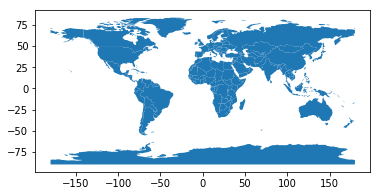

In [30]:
# plot the map to see how it looks
world_map.plot();

By looking at the map, I see Antarctica is taking a large space on the map, before deleting it, I will check `data` DataFrame, whether Antarctica have recorded any cases, if not, then there is no need to keep it

In [31]:
# check if Antarctica have cases in data if not then delete it from world_map
data['continentExp'].unique()

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania', 'Other'],
      dtype=object)

As we can see there is not any cases recorded in Antarctica, so I will delete it from the shapefile

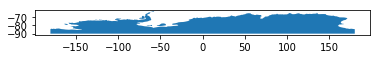

In [32]:
# double check which part of the map Antarctica represent
world_map.loc[world_map['name']=='Antarctica', 'geometry'].plot()

#### To Clean:
#### `data` file
1. Some column names are too long or not well defined
2. Remove columns: `year`, `month`, and `day` since they are already included in the `dateRep` column. Also remove `Cumulative_number_for_14_days_of_COVID-19_cases_per_100000` column as I don't need it
3. Missing values in `geoId`
4. Missing values in `countryterritoryCode` and `popData2019`
5. `dateRep` is string not a DateTime object
6. `popData2018` is float not integer


#### `ctrys_data` file
1. Change column names for convenience
2. The country "Namibia" has missing country code
3. Drop columns at index 235 and 236
4. Keep the following columns only: `Country`, `Country Code` and `Density (P/Km2)` 

#### `world_map` file
1. Change the column names for convenience
2. Drop `pop_est` and `gdp_md_est`
3. Delete "Antarctica" from the map as it takes large space with no cases presented in it

## Clean


In [39]:
# create copy DataFrames of the original data
df = data.copy()
df_ctrys = ctrys_data.copy()
df_map = world_map.copy()

### `df` DataFrame

#### 1. Column names
##### <font color = blue>Define</font>

- Change the column names using `df.rename`

##### <font color = blue>Code</font>


In [40]:
df.rename(columns = {'dateRep':'date', 'countriesAndTerritories': 'country','geoId': 'iso_2','countryterritoryCode':
                     'iso_3', 'popData2019':'population','continentExp':'continent'}, inplace = True)

##### <font color = blue>Test</font>

In [41]:
df.head()

,date,day,month,year,cases,deaths,country,iso_2,iso_3,population,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,31/07/2020,31,7,2020,71,0,Afghanistan,AF,AFG,38041757.0,Asia,3.869432
1,30/07/2020,30,7,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,3.882576
2,29/07/2020,29,7,2020,103,1,Afghanistan,AF,AFG,38041757.0,Asia,4.550263
3,28/07/2020,28,7,2020,105,1,Afghanistan,AF,AFG,38041757.0,Asia,5.028685
4,27/07/2020,27,7,2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia,4.763187


#### 2. Remove unnecessary columns
##### <font color = blue>Define</font>

- Remove `day`, `month`, `year`, and `Cumulative_number_for_14_days_of_COVID-19_cases_per_100000` columns using `df.drop`

##### <font color = blue>Code</font>


In [42]:
df.drop(columns=['day', 'month', 'year', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], inplace=True)

##### <font color = blue>Test</font>

In [43]:
df.head()

,date,cases,deaths,country,iso_2,iso_3,population,continent
0,31/07/2020,71,0,Afghanistan,AF,AFG,38041757.0,Asia
1,30/07/2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia
2,29/07/2020,103,1,Afghanistan,AF,AFG,38041757.0,Asia
3,28/07/2020,105,1,Afghanistan,AF,AFG,38041757.0,Asia
4,27/07/2020,106,10,Afghanistan,AF,AFG,38041757.0,Asia


#### 3. Missing Values in `iso_2`
##### <font color = blue>Define</font>

I will obtain the country code for "Namibia" from [CountryCode.org](https://countrycode.org/namibia), I found that the country code for "Namibia" is "NA", so I will assign that value using `df.loc`.

##### <font color = blue>Code</font>

In [44]:
# update the iso_2 for the country Namibia
df.loc[df['country']=='Namibia', 'iso_2'] = 'NA'

##### <font color=blue>Test

In [45]:
# check the first five rows of county Namibia
df[df['country']=='Namibia'].head()

,date,cases,deaths,country,iso_2,iso_3,population,continent
21287,31/07/2020,66,1,Namibia,NA,NAM,2494524.0,Africa
21288,30/07/2020,69,1,Namibia,NA,NAM,2494524.0,Africa
21289,29/07/2020,74,0,Namibia,NA,NAM,2494524.0,Africa
21290,28/07/2020,68,0,Namibia,NA,NAM,2494524.0,Africa
21291,27/07/2020,88,1,Namibia,NA,NAM,2494524.0,Africa


#### 4. Missing values in `countryterritoryCode` and `popData2019`
##### <font color =blue>Define</font>

- Missing values in both columns is due to the entries where country is equal to "Cases_on_an_international_conveyance_Japan" since this is a ship not a country then I will delete it.

##### <font color =blue>Code</font>

In [46]:
df.drop(df[df['country']=='Cases_on_an_international_conveyance_Japan'].index, inplace=True)

##### <font color =blue>Test</font>

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33204 entries, 0 to 33267
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        33204 non-null  object 
 1   cases       33204 non-null  int64  
 2   deaths      33204 non-null  int64  
 3   country     33204 non-null  object 
 4   iso_2       33204 non-null  object 
 5   iso_3       33204 non-null  object 
 6   population  33204 non-null  float64
 7   continent   33204 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.3+ MB


#### 5. `dateRep`(`date`) column is a string not a DateTime
##### <font color =blue>Define</font>

- Change the format of `date` from string to DateTime object using `pd.to_datetime`, also note that the date is in European format, i.e., dd/mm/yyyy, so we need to pass `dayfirst=True`

##### <font color =blue>Code</font>

In [48]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

##### <font color =blue>Test</font>

In [49]:
df['date'].dtype

dtype('<M8[ns]')

#### 6. `popData2018`(`population`) column is a float not integer
##### <font color =blue>Define</font>

- Change the format of `population` from float to integer using `pd.DataFrame.astype`

##### <font color =blue>Code</font>

In [50]:
df['population'] = df['population'].astype(int)

##### <font color =blue>Test</font>

In [51]:
df['population'].dtype

dtype('int32')

----

### `df_ctrys`  DataFrame

#### 1.  Change column names
##### <font color =blue>Define</font>

- Change column names as follows: `Country` to `country` and `country code` to `iso_2` and `Density (P/Km2)` to `density`

##### <font color =blue>Code</font>

In [52]:
df_ctrys.rename(columns={'Country': 'country', 'Country Code': 'iso_2', 'Density (P/Km2)': 'density'}, inplace=True)

##### <font color =blue>Test</font>

In [53]:
df_ctrys.head()

,Internal_Row_ID,country,iso_2,Population,Yearly Change,Net Change,density,Land Area (Km2),Migrants (net),Fertility Rate,Medium Age,Urban Pop %,World Share
0,1,China,CN,"1,439,323,776",0.39%,"5,540,090",153.0,"9,388,211","-348,399",1.7,38.0,61%,18.47%
1,2,India,IN,"1,380,004,385",0.99%,"13,586,631",464.0,"2,973,190","-532,687",2.2,28.0,35%,17.70%
2,3,United States,US,"331,002,651",0.59%,"1,937,734",36.0,"9,147,420","954,806",1.8,38.0,83%,4.25%
3,4,Indonesia,ID,"273,523,615",1.07%,"2,898,047",151.0,"1,811,570","-98,955",2.3,30.0,56%,3.51%
4,5,Pakistan,PK,"220,892,340",2.00%,"4,327,022",287.0,"77,088","-233,379",3.6,23.0,35%,2.83%


#### 2.  The country Namibia has missing ISO code
##### <font color =blue>Define</font>
- From [CountryCode.org](https://countrycode.org/namibia), I found that the country code for "Namibia" is "NA", so I will assign that value using `df.loc`

##### <font color =blue>Code</font>

In [54]:
df_ctrys.loc[df_ctrys['country']=='Namibia', 'iso_2'] = 'NA'

##### <font color =blue>Test</font>

In [55]:
df_ctrys[df_ctrys['country']=='Namibia']

,Internal_Row_ID,country,iso_2,Population,Yearly Change,Net Change,density,Land Area (Km2),Migrants (net),Fertility Rate,Medium Age,Urban Pop %,World Share
142,143,Namibia,NA,"2,540,905",1.86%,"46,375",3.0,"82,329","-4,806",3.4,22.0,55%,0.03%


#### 3.  Drop rows at index 235 and 236
##### <font color =blue>Define</font>
- Drop those columns using `df.drop` since they don't represent any entries

##### <font color =blue>Code</font>

In [56]:
df_ctrys.drop(index=[235, 236], inplace=True)

##### <font color =blue>Test</font>

In [57]:
# check the last rows in the dataframe
df_ctrys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Internal_Row_ID  235 non-null    int64  
 1   country          235 non-null    object 
 2   iso_2            235 non-null    object 
 3   Population       235 non-null    object 
 4   Yearly Change    235 non-null    object 
 5   Net Change       235 non-null    object 
 6   density          235 non-null    float64
 7   Land Area (Km2)  235 non-null    object 
 8   Migrants (net)   201 non-null    object 
 9   Fertility Rate   201 non-null    float64
 10  Medium Age       201 non-null    float64
 11  Urban Pop %      222 non-null    object 
 12  World Share      235 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 25.7+ KB


#### 4.  Drop unneeded columns
##### <font color =blue>Define</font>
- Keep the following columns only: `country`, `ctry_code` and `density`

##### <font color =blue>Code</font>

In [58]:
df_ctrys = df_ctrys[['country', 'iso_2', 'density']]

##### <font color =blue>Test</font>

In [59]:
df_ctrys.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 234
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  235 non-null    object 
 1   iso_2    235 non-null    object 
 2   density  235 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.3+ KB


----

### `df_map` DataFrame
#### 1. Change column names

##### <font color =blue>Define</font>
- Change the column names `name` to `country`, `iso_a3` to `iso_3` using `pd.rename`


##### <font color =blue>Code</font>

In [60]:
df_map.rename(columns = {'name':'country', 'iso_a3': 'iso_3'}, inplace=True)

##### <font color =blue>Test</font>

In [61]:
df_map.head()

,pop_est,continent,country,iso_3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


#### 2. Drop `pop_est` and `gdp_md_est`

##### <font color =blue>Define</font>
- Drop `pop_est` and `gdp_md_est` columns using `df.drop()` since I don't need them


##### <font color =blue>Code</font>

In [63]:
df_map.drop(columns=['pop_est', 'gdp_md_est'], inplace=True)

##### <font color =blue>Test</font>

In [64]:
df_map.head()

,continent,country,iso_3,geometry
0,Oceania,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Africa,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Africa,W. Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,North America,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


#### 3. Delete Antarctica

##### <font color =blue>Define</font>
- Since we don't have any cases in Antactica and it takes a alarge space on the map, I will delete it from the `df_map`


##### <font color =blue>Code</font>

In [65]:
df_map.drop(df_map[df_map['country']=='Antarctica'].index, inplace=True)

##### <font color =blue>Test</font>

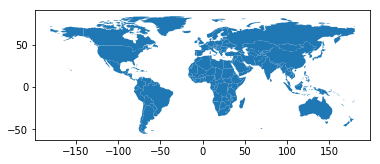

In [66]:
df_map.plot();

----

In [67]:
# find the number of unique countries in all three DataFrames
print('The number of unique Coutnries in df is:', len(df['country'].unique()))
print('The number of unique Coutnries in df_ctrys is:', len(df_ctrys))
print('The number of unique Coutnries in df_map is:', len(df_map['country'].unique()))

The number of unique Coutnries in df is: 209
The number of unique Coutnries in df_ctrys is: 235
The number of unique Coutnries in df_map is: 176


### Merging `df`, `df_ctrys`, and `df_map`
At this point, we have three DataFrames `df`, `df_ctrys`, and `df_map` with different unique number of countries. Now, I will need to make two merges, the first merge is between `df` and `df_by_ctry`, and the second merge is between the merged DataFrame and `df_map`.

I could merge all the three DataFramee now, but this will cause a problem. Since the entries in `df` is recorded per day not per country, merging it with `df_map` will prevent the geometry column from plotting. One solution is to group entries in `df` by `country`. However, doing this in the cleaning phase will prevent me from further analysis later in the exploration phase. For example, later, I may want to make analysis on daily or weekly cases, and so on. Therefore, I will keep this merging in the exploration phase, but I will clean both files to make them ready for merging later.

Now, it is okay to merge `df` and `df_ctrys` here. Since I care more about the countries with cases and deaths, I will make`df` the left DataFrame and merge on `iso_2`

### Assess `df` and `df_ctrys` for Merging

In [77]:
# check which countries are in df but not in df_ctrys
missmatch = df[~df['iso_2'].isin(df_ctrys['iso_2'])]['country'].unique()
missmatch

array(['Greece', 'Guernsey', 'Jersey', 'Kosovo', 'United_Kingdom'],
      dtype=object)

We see that we have five countries/entities in `df` that are not in `df_ctrys`. There could be two reasons for that, one is that the ISO code could have been written differently in each DataFrame, or simply, the country is not available in the second DataFrame. To look for those countries in `df_ctrys`, I will take the most common part of the word for each of the above country names and search it in the other DataFrame, if found, I will search online for the correct ISO code and replace the wrong one. If not, then it means the country is not available in `df_ctrys` and I need to add it.

In [78]:
# use pd.str.contains() to look for part of those missing countries and find them wit ISO code in df_ctrys
# Greece
df_ctrys[df_ctrys['country'].str.contains('Greece')]

,country,iso_2,density
86,Greece,GR,81.0


In [79]:
# check how the ISO code was reocrded in df
df[df['country']=='Greece']['iso_2'].unique()

array(['EL'], dtype=object)

In [80]:
# Guernsey and Jersey
df_ctrys[df_ctrys['country'].str.contains('sey')]

,country,iso_2,density


In [81]:
#Kosovo
df_ctrys[df_ctrys['country'].str.contains('oso')]

,country,iso_2,density


In [82]:
# United_Kingdom
df_ctrys[df_ctrys['country'].str.contains('United')]

,country,iso_2,density
2,United States,US,36.0
20,United Kingdom,GB,281.0
92,United Arab Emirates,AE,118.0


In [83]:
# check how the ISO code was recorded in df for United Kingdom
df[df['country']=='United_Kingdom']['iso_2'].unique()

array(['UK'], dtype=object)

Now, I am interested in looking for countries that are available in `df_ctrys` but not in `df`, is it because those countries have not yet recorded cases, or there are some other issues?

In [84]:
df_ctrys[~df_ctrys['iso_2'].isin(df['iso_2'])]['country'].unique()

array(['United Kingdom', 'North Korea', 'Greece', 'Hong Kong',
       'Turkmenistan', 'Réunion', 'Solomon Islands', 'Macao',
       'Guadeloupe', 'Martinique', 'Vanuatu', 'French Guiana', 'Mayotte',
       'Samoa', 'Channel Islands', 'Kiribati', 'Micronesia', 'Tonga',
       'Marshall Islands', 'American Samoa', 'Saint Martin', 'Palau',
       'Cook Islands', 'Tuvalu', 'Wallis & Futuna', 'Nauru',
       'Saint Barthelemy', 'Saint Helena', 'Saint Pierre & Miquelon',
       'Niue', 'Tokelau'], dtype=object)

So most of those countries are islands and small entities that I am not going to worry about assuming they still have not yet gotten cases. However, I am concerned about 'Turkmenistan', 'North Korea' and 'Hong Kong'. After looking online, I found that 'Turkmenistan' and 'North Korea' have not yet recorded cases. However, 'Hong Kong' has recorded cases. To count for ‘Hong Kong’, I will assume their data are included in 'China' in the original data, `df`

### To Clean  `df` and `df_ctrys` for Merging:
#### `df` with `df_ctrys`
1. ISO code for 'Greece' was recorded as 'EL' in `df` while 'GR' in `df_ctrys`
2. ISO code for 'United Kingdom' was recorded as 'UK' in `df` while 'GB' in `df_ctrys`
3. Islands 'Guernsey', 'Jersey', ‘Kosovo’ are not available in `df_ctry`

### Clean 

In [85]:
# create a copy of df and df_ctrys
df_copy = df.copy()
df_ctrys_copy = df_ctrys.copy()

#### 1.  Greece and United Kingdom ISO code is a missmatch
##### <font color =blue>Define</font>
- Since the ISO code is different in both dataframes, I searched the correct value using [iban.com](https://www.iban.com/country-codes) and found the correct code is "GR" for Greece and "GB" for the United Kingdom, so I will change the value of `iso_2` column in `df` using `pd.replace()`

##### <font color =blue>Code</font>

In [86]:
df_copy['iso_2'].replace({'EL': 'GR', 'UK': 'GB'}, inplace=True)

##### <font color =blue>Test</font>

In [87]:
missmatch = df_copy[~df_copy['iso_2'].isin(df_ctrys_copy['iso_2'])]['country'].unique()
missmatch

array(['Guernsey', 'Jersey', 'Kosovo'], dtype=object)

#### 2.  "Guernsey", "Jersey", and "Kosovo" records are not available in `df_ctrys`
##### <font color =blue>Define</font>
- From [Wikipedia](https://en.wikipedia.org/wiki/Guernsey) I will get the required info, create a dictionary, create a DataFrame from that dictionary then use`df.append()` method to add the new DataFrame to `df_ctrys_copy`

##### <font color =blue>Code</font>

In [88]:
# create a dictionary to add the three rows
new_rows = {'country': ['Guernsey', 'Jersey', 'Kosovo'], 'iso_2': ['GG', 'JE', 'XK'], 'density': [965, 912, 159]}

# create a new df to append to df_ctrys_copy
new_df = pd.DataFrame(new_rows)
new_df

,country,iso_2,density
0,Guernsey,GG,965
1,Jersey,JE,912
2,Kosovo,XK,159


In [89]:
# append new_df to df_ctrys_copy
df_ctrys_copy = df_ctrys_copy.append(new_df, ignore_index=True)

##### <font color =blue>Test</font>

In [90]:
df_ctrys_copy.tail()

,country,iso_2,density
233,Tokelau,TK,136.0
234,Holy See,VA,2003.0
235,Guernsey,GG,965.0
236,Jersey,JE,912.0
237,Kosovo,XK,159.0


In [91]:
# check if we still have missmatch
missmatch = df_copy[~df_copy['iso_2'].isin(df_ctrys_copy['iso_2'])]['country'].unique()
missmatch

array([], dtype=object)

Now, we should be able to merge both DataFrames on `iso_2`

In [92]:
# create a new df, df_merge 
df_merge = pd.merge(df_copy, df_ctrys_copy, how='left', left_on='iso_2', right_on='iso_2')

In [93]:
# check the head of df_merge
df_merge.head()

,date,cases,deaths,country_x,iso_2,iso_3,population,continent,country_y,density
0,2020-07-31,71,0,Afghanistan,AF,AFG,38041757,Asia,Afghanistan,60.0
1,2020-07-30,0,0,Afghanistan,AF,AFG,38041757,Asia,Afghanistan,60.0
2,2020-07-29,103,1,Afghanistan,AF,AFG,38041757,Asia,Afghanistan,60.0
3,2020-07-28,105,1,Afghanistan,AF,AFG,38041757,Asia,Afghanistan,60.0
4,2020-07-27,106,10,Afghanistan,AF,AFG,38041757,Asia,Afghanistan,60.0


In [94]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33204 entries, 0 to 33203
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        33204 non-null  datetime64[ns]
 1   cases       33204 non-null  int64         
 2   deaths      33204 non-null  int64         
 3   country_x   33204 non-null  object        
 4   iso_2       33204 non-null  object        
 5   iso_3       33204 non-null  object        
 6   population  33204 non-null  int32         
 7   continent   33204 non-null  object        
 8   country_y   33204 non-null  object        
 9   density     33204 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(5)
memory usage: 2.7+ MB


As we can see, new columns were created, this is because both DataFrames we merged have the same column names, so pandas renamed those columns by adding x and y. Since I want to have the data from `df_copy`, i.e., the left DataFrame, I will drop `country_y` then rename `country_x` to `country`

In [95]:
# drop country_y
df_merge.drop('country_y', axis=1, inplace=True)

In [96]:
# rename country_x
df_merge.rename(columns={'country_x': 'country'}, inplace=True)

In [97]:
# check df_merge
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33204 entries, 0 to 33203
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        33204 non-null  datetime64[ns]
 1   cases       33204 non-null  int64         
 2   deaths      33204 non-null  int64         
 3   country     33204 non-null  object        
 4   iso_2       33204 non-null  object        
 5   iso_3       33204 non-null  object        
 6   population  33204 non-null  int32         
 7   continent   33204 non-null  object        
 8   density     33204 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(4)
memory usage: 2.4+ MB


In [98]:
# final check to see if the the number of unique countries in df_merge equal to the original df
df_merge['country'].nunique() == df['country'].nunique()

True

### Assess `df_merge` and `df_map`

Now, I am going to look for countries that are in `df_merge` but not in `df_map`, although, I am neither going to change the map by adding countries to it, nor going to change `df_merge`. Instead, I am going to see if the ISO code was written differently in both DataFrames or other issues were found.

I will use `iso_3` as the common column between both DataFrames


In [99]:
# check which countries in df thier ISO codes are not in df_ctrys
missmatch = df_merge[~df_merge['iso_3'].isin(df_map['iso_3'])]['country'].unique()
missmatch

array(['Andorra', 'Anguilla', 'Antigua_and_Barbuda', 'Aruba', 'Bahrain',
       'Barbados', 'Bermuda', 'Bonaire, Saint Eustatius and Saba',
       'British_Virgin_Islands', 'Cape_Verde', 'Cayman_Islands',
       'Comoros', 'Curaçao', 'Dominica', 'Faroe_Islands', 'France',
       'French_Polynesia', 'Gibraltar', 'Grenada', 'Guam', 'Guernsey',
       'Holy_See', 'Isle_of_Man', 'Jersey', 'Kosovo', 'Liechtenstein',
       'Maldives', 'Malta', 'Mauritius', 'Monaco', 'Montserrat',
       'Northern_Mariana_Islands', 'Norway', 'Saint_Kitts_and_Nevis',
       'Saint_Lucia', 'Saint_Vincent_and_the_Grenadines', 'San_Marino',
       'Sao_Tome_and_Principe', 'Seychelles', 'Singapore', 'Sint_Maarten',
       'Taiwan', 'Turks_and_Caicos_islands',
       'United_States_Virgin_Islands'], dtype=object)

As we can see, most of the names in the list are islands and small countries like 'Bahrain' and 'Monaco' except some big countries that I care about to have in the analysis. I will put them in a list as follows:

In [100]:
ctrys_list = ['France', 'Kosovo', 'Norway', 'Taiwan']

In [102]:
# retrieve the entries from df_map for above countries
df_map[df_map['country'].isin(ctrys_list)]

,continent,country,iso_3,geometry
21,Europe,Norway,-99,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
43,Europe,France,-99,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
140,Asia,Taiwan,TWN,"POLYGON ((121.77782 24.39427, 121.17563 22.790..."
174,Europe,Kosovo,-99,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


After checking 'Taiwan' iso_3 code using [iban.com](https://www.iban.com/country-codes) , the code is correct. Now, let's see if those country names are available in `df_merege`

In [104]:
# check how iso code is written in df_merge for above countries
df_merge[df_merge['country'].isin(ctrys_list)][['country', 'iso_3']].sample(10)

,country,iso_3
10995,France,FRA
11014,France,FRA
23096,Norway,NOR
10942,France,FRA
11116,France,FRA
16857,Kosovo,XKX
16836,Kosovo,XKX
16883,Kosovo,XKX
10985,France,FRA
29733,Taiwan,CNG1925


So we can conclude that 'France', 'Norway', and 'Kosovo' have a wrong ISO code written in `df_map`, while 'Tiwan' has a wrong ISO code written in `df_merge`.

In [101]:
# let's check the county names in df_map but not in df_merge
df_map[~df_map['iso_3'].isin(df_merge['iso_3'])]

,continent,country,iso_3,geometry
21,Europe,Norway,-99,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
23,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,"POLYGON ((68.93500 -48.62500, 69.58000 -48.940..."
43,Europe,France,-99,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
89,Oceania,Vanuatu,VUT,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488..."
95,Asia,North Korea,PRK,"MULTIPOLYGON (((130.78000 42.22001, 130.78000 ..."
106,Asia,Turkmenistan,TKM,"POLYGON ((52.50246 41.78332, 52.94429 42.11603..."
135,Oceania,Solomon Is.,SLB,"MULTIPOLYGON (((162.11902 -10.48272, 162.39865..."
140,Asia,Taiwan,TWN,"POLYGON ((121.77782 24.39427, 121.17563 22.790..."
160,Asia,N. Cyprus,-99,"POLYGON ((32.73178 35.14003, 32.80247 35.14550..."
167,Africa,Somaliland,-99,"POLYGON ((48.94820 11.41062, 48.94820 11.41062..."


After fixing 'France', 'Kosovo', 'Norway', and 'Taiwan', we will have some entities that is not available in `df_merge`. Most likely because they have not yet recorded cases.

### To Clean for Merging:
#### `df_merge` with `df_map`
1. Change the ISO codes in `df_map` for 'Norway', 'France', and 'Kosovo'
2. Change the ISO code in `df_merge` for 'Tiawan'

### Clean

In [105]:
# make copy of df_merge and df_map
df_merge_copy = df_merge.copy()
df_map_copy = df_map.copy()

#### 1.  'Norway', 'France', and 'Kosovo' ISO code in `df_map` is not correct
##### <font color =blue>Define</font>
- Change them by assinging new values using `df.loc` method

##### <font color =blue>Code</font>

In [106]:
# change Norway, France, Kosovo iso codes
df_map_copy.loc[df_map_copy['country']=='Norway', 'iso_3'] = 'NOR'
df_map_copy.loc[df_map_copy['country']=='France', 'iso_3'] = 'FRA'
df_map_copy.loc[df_map_copy['country']=='Kosovo', 'iso_3'] = 'XKX'

##### <font color =blue>Test</font>

In [107]:
df_map_copy[df_map_copy['country'].isin(ctrys_list)]

,continent,country,iso_3,geometry
21,Europe,Norway,NOR,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
43,Europe,France,FRA,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
140,Asia,Taiwan,TWN,"POLYGON ((121.77782 24.39427, 121.17563 22.790..."
174,Europe,Kosovo,XKX,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


#### 2.  'Taiwan' ISO code in `df_merge` is not correct
##### <font color =blue>Define</font>
- Change it by assigning new value using `df.loc` method

##### <font color =blue>Code</font>

In [108]:
df_merge_copy.loc[df_merge_copy['country']=='Taiwan', 'iso_3'] = 'TWN'

##### <font color =blue>Test</font>

In [109]:
df_merge_copy[df_merge_copy['country']=='Taiwan'].head()

,date,cases,deaths,country,iso_2,iso_3,population,continent,density
29587,2020-07-31,0,0,Taiwan,TW,TWN,23773881,Asia,673.0
29588,2020-07-30,0,0,Taiwan,TW,TWN,23773881,Asia,673.0
29589,2020-07-29,0,0,Taiwan,TW,TWN,23773881,Asia,673.0
29590,2020-07-28,5,0,Taiwan,TW,TWN,23773881,Asia,673.0
29591,2020-07-27,4,0,Taiwan,TW,TWN,23773881,Asia,673.0


### Saving The Files for Exploration
Now, I will save `df_merge_copy` and `df_map_copy` to the local disk, then retrieve them in the exploration phase

In [110]:
df_merge_copy.to_csv('covid_19_clean.csv', index=False)
df_map_copy.to_file('world_map.shp')